**<font size=8>Predicting Store Sales**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv("/content/drive/Othercomputers/My Laptop (1)/Desktop/Karan GFG/train.csv.zip")
stores=pd.read_csv("/content/drive/Othercomputers/My Laptop (1)/Desktop/Karan GFG/stores.csv")
oil=pd.read_csv("/content/drive/Othercomputers/My Laptop (1)/Desktop/Karan GFG/oil.csv")
holidays=pd.read_csv("/content/drive/Othercomputers/My Laptop (1)/Desktop/Karan GFG/holidays_events.csv")
transactions=pd.read_csv("/content/drive/Othercomputers/My Laptop (1)/Desktop/Karan GFG/transactions.csv.zip")
test=pd.read_csv("/content/drive/Othercomputers/My Laptop (1)/Desktop/Karan GFG/test.csv")

In [4]:
datasets = {
    'train': train,
    'stores': stores,
    'oil': oil,
    'holidays': holidays,
    'transactions': transactions}

In [5]:
for name, df in datasets.items():
    print(f"\n===== {name} =====")
    print(df.info())
    print("*"*30)
    print(df.describe())
    print("*"*30)
    print(df.isnull().sum())
    print("*"*30)
    print("\n")


===== train =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None
******************************
                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02
***

**EDA**

In [6]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


**Sales Trend Over Time**

<Axes: title={'center': 'Total Sales Over Time'}, xlabel='date'>

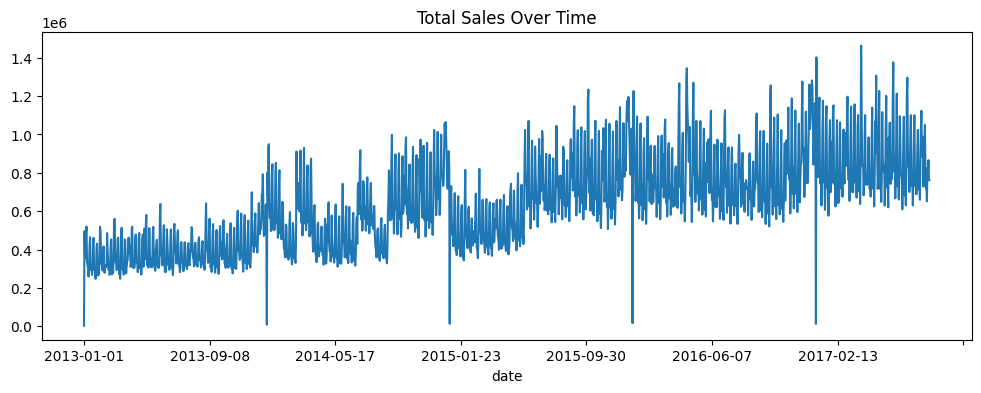

In [7]:
train.groupby('date')['sales'].sum().plot(figsize=(12,4), title='Total Sales Over Time')

**Average Sales By Day Of Week**

<Axes: title={'center': 'Average Sales by Day of Week'}, xlabel='date'>

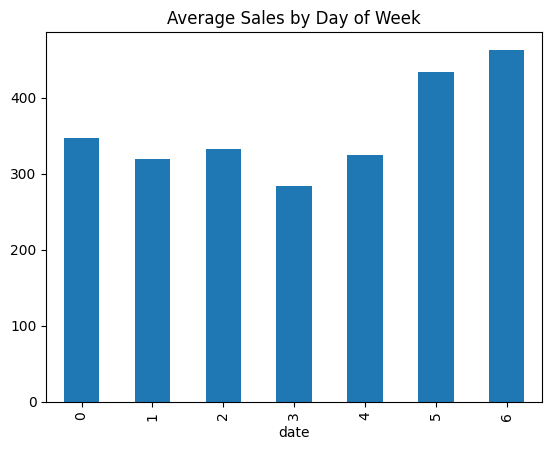

In [8]:
train['date'] = pd.to_datetime(train['date'])
train.groupby(train['date'].dt.dayofweek)['sales'].mean().plot(
    kind='bar', title='Average Sales by Day of Week')

**Sales By Month**

<Axes: title={'center': 'Average Sales by Month'}, xlabel='date'>

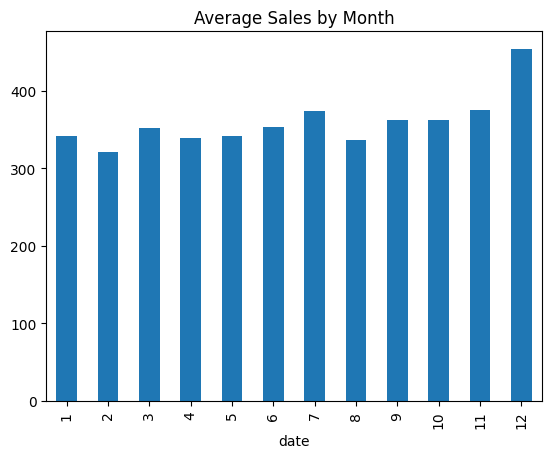

In [9]:
train['date'] = pd.to_datetime(train['date'])
train.groupby(train['date'].dt.month)['sales'].mean().plot(
    kind='bar', title='Average Sales by Month')

**Store Level Analysis**

<Axes: title={'center': 'Average Sales per Store'}, xlabel='store_nbr'>

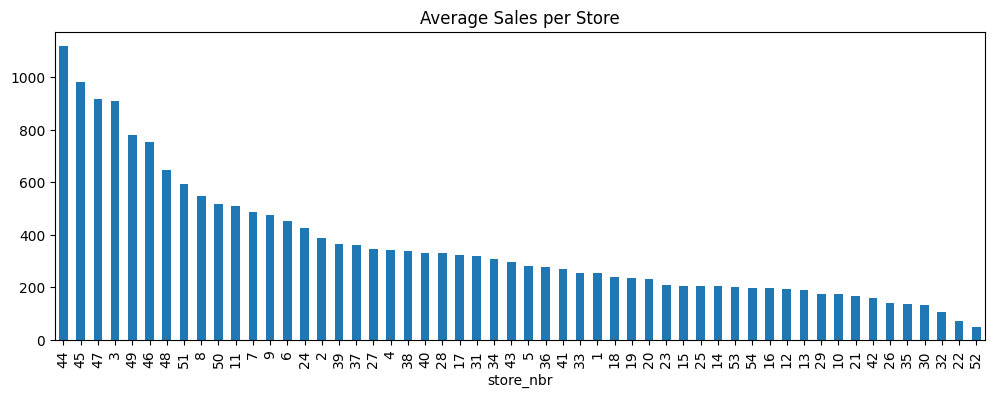

In [10]:
train.groupby('store_nbr')['sales'].mean().sort_values(ascending=False).plot(
    kind='bar', figsize=(12,4), title='Average Sales per Store')

In [11]:
num_unique_stores = train['store_nbr'].nunique()
print(f"Total number of unique stores: {num_unique_stores}")

Total number of unique stores: 54


**Product Family Analysis**

<Axes: title={'center': 'Average Sales per Product Family'}, ylabel='family'>

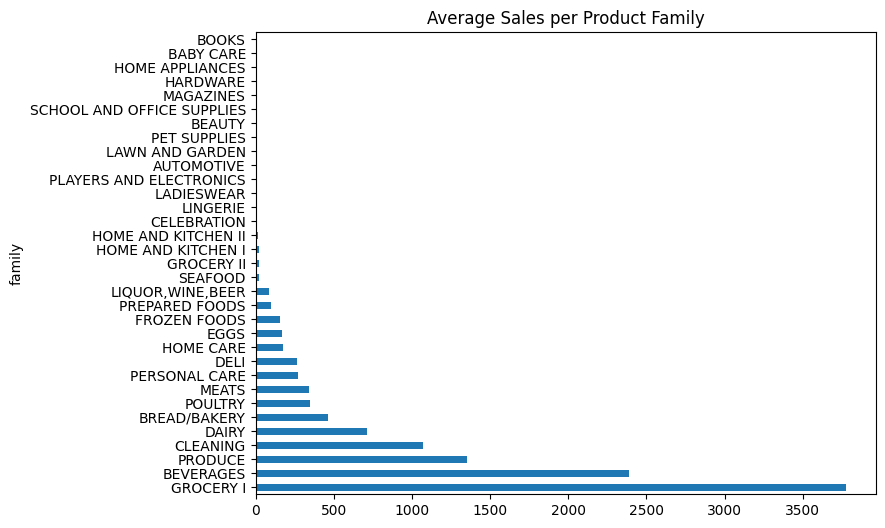

In [12]:
train.groupby('family')['sales'].mean().sort_values(ascending=False).plot(kind='barh', figsize=(8,6), title='Average Sales per Product Family')

**Merging Extra Files**

In [13]:
##Again Loading All Datasets...
train=pd.read_csv("/content/drive/Othercomputers/My Laptop (1)/Desktop/Karan GFG/train.csv.zip")
stores=pd.read_csv("/content/drive/Othercomputers/My Laptop (1)/Desktop/Karan GFG/stores.csv")
oil=pd.read_csv("/content/drive/Othercomputers/My Laptop (1)/Desktop/Karan GFG/oil.csv")
holidays=pd.read_csv("/content/drive/Othercomputers/My Laptop (1)/Desktop/Karan GFG/holidays_events.csv")
transactions=pd.read_csv("/content/drive/Othercomputers/My Laptop (1)/Desktop/Karan GFG/transactions.csv.zip")
test=pd.read_csv("/content/drive/Othercomputers/My Laptop (1)/Desktop/Karan GFG/test.csv")
# --- Merge Oil Prices ---
oil['dcoilwtico'] = oil['dcoilwtico'].ffill()
train = train.merge(oil, on='date', how='left')
test = test.merge(oil, on='date', how='left')

# --- Merge Holidays ---
holidays['is_holiday'] = 1
holidays = holidays[['date', 'is_holiday']].drop_duplicates(subset='date')
train = train.merge(holidays, on='date', how='left')
test = test.merge(holidays, on='date', how='left')
train['is_holiday'] = train['is_holiday'].fillna(0)
test['is_holiday'] = test['is_holiday'].fillna(0)

# --- Merge Transactions ---
train = train.merge(transactions, on=['date', 'store_nbr'], how='left')
test = test.merge(transactions, on=['date', 'store_nbr'], how='left')
train['transactions'] = train['transactions'].fillna(0)
test['transactions'] = test['transactions'].fillna(0)

# --- Merge Store Metadata ---
train = train.merge(stores, on='store_nbr', how='left')
test = test.merge(stores, on='store_nbr', how='left')

print('Train dataset after merging:')
display(train.head())

print('\nTest dataset after merging:')
display(test.head())

Train dataset after merging:


,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,is_holiday,transactions,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,1.0,0.0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,1.0,0.0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,1.0,0.0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,1.0,0.0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,1.0,0.0,Quito,Pichincha,D,13



Test dataset after merging:


,id,date,store_nbr,family,onpromotion,dcoilwtico,is_holiday,transactions,city,state,type,cluster
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8,0.0,0.0,Quito,Pichincha,D,13
1,3000889,2017-08-16,1,BABY CARE,0,46.8,0.0,0.0,Quito,Pichincha,D,13
2,3000890,2017-08-16,1,BEAUTY,2,46.8,0.0,0.0,Quito,Pichincha,D,13
3,3000891,2017-08-16,1,BEVERAGES,20,46.8,0.0,0.0,Quito,Pichincha,D,13
4,3000892,2017-08-16,1,BOOKS,0,46.8,0.0,0.0,Quito,Pichincha,D,13


In [14]:
print(train.shape)
print(test.shape)

(3000888, 13)
(28512, 12)


**Feature Engineering**

In [16]:
#Convert categorical column (family) to numeric codes
train['family_encoded'] = train['family'].astype('category').cat.codes
test['family_encoded'] = test['family'].astype('category').cat.codes

# Encode object columns to numeric
for col in ['city', 'state', 'type']:
    if col in train.columns:
        train[col] = train[col].astype('category').cat.codes
        test[col] = test[col].astype('category').cat.codes

# Convert 'date' columns to datetime objects
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

#Add date-based feature
train['day_of_week'] = train['date'].dt.dayofweek
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train['day_of_month'] = train['date'].dt.day
train['week_of_year'] = train['date'].dt.isocalendar().week.astype(int)
test['day_of_week'] = test['date'].dt.dayofweek
test['month'] = test['date'].dt.month
test['year'] = test['date'].dt.year
test['day_of_month'] = test['date'].dt.day
test['week_of_year'] = test['date'].dt.isocalendar().week.astype(int)


#Weekend Flag
train['is_weekend'] = train['day_of_week'].isin([5, 6]).astype(int)
test['is_weekend'] = test['day_of_week'].isin([5, 6]).astype(int)

#Store type encoding
train['store_type_encoded'] = train['type'].astype('category').cat.codes
test['store_type_encoded'] = test['type'].astype('category').cat.codes

#Holiday Interaction
# Higher sales expected just before holidays
train['holiday_lag'] = train.groupby('store_nbr')['is_holiday'].shift(-1).fillna(0)
test['holiday_lag'] = test['is_holiday']  # no shift for test

**XGBOOST MODEL**

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
import numpy as np


In [18]:
#Prepare Features and Target
# Target variable
y = train['sales']

# Features to use (add/remove as needed)
# Drop columns not used as features
drop_cols = ['id', 'date', 'sales', 'family']  # keep family_encoded

# Select all other columns as features
features = [col for col in train.columns if col not in drop_cols]

# Prepare training and test data
X = train[features]
X_test = test[features]

In [19]:
#Train/Test Split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, shuffle=False)  # No shuffling due to time-series nature

#Train XGBoost Model
model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42)

In [20]:
model.fit(X_train, y_train)

# Validation performance
val_pred = model.predict(X_val)
rmsle = np.sqrt(mean_squared_log_error(y_val, np.maximum(0, val_pred)))
print("Validation RMSLE:", rmsle)

#Generate Submission
# Predict on test set
test['sales'] = np.maximum(0, model.predict(X_test))


Validation RMSLE: 1.6092924280095526


In [23]:
# Create submission
submission = test[['id', 'sales']]
submission.to_csv('submission.csv', index=False)